 [**Github_Repository**](https://github.com/VincentBEDU/DSS/blob/main/DSSS_CourseWork.ipynb)   

`Word_count:1997`

# Investigating the Impact of Building Attributes and Energy Efficiency Ratings on Housing Price Fluctuations in Reading

## Introduction
Shelter is essential in every economy ([Amin and Al-Din, 2018](https://ijcua.com/index.php/ijcua/article/view/60/58)), as it is considered a necessity for human existence per Maslow’s theory of needs. The variations in house prices impact every facet of individuals, communities, and the broader economic environment. Therefore, policymakers, real estate professionals, and homeowners must fully comprehend the numerous factors impacting these changes in a particular geographical region. In Reading, a thriving town in Berkshire, United Kingdom, the housing market undergoes fluctuations caused by several factors such as location, property physical features, neighbourhood amenities, etc.  According to [Zancanella et al., (2018)](https://revalue-project.eu/wp-content/uploads/2019/02/JRC_EE-value-of-buildings-and-payment-default-risk_2018.pdf), the physical characteristics of the buildings and their energy efficiency rating are important factors that influence house prices. Despite several studies on this subject, empirical examination of the impact of legal interest and energy efficiency rating remains scarce in this study area. This research aims to bridge this gap by investigating how major building attributes and energy efficiency ratings influence housing price fluctuations in Reading, providing valuable insights into the dynamics of the local housing market.


## Literature Review
Fluctuation in property prices is caused by numerous factors, including micro and macroeconomic conditions, demographic trends, and housing supply and demand dynamics of the market segment [(Abate and Anselin, 2016)](https://pure.au.dk/portal/en/publications/house-price-fluctuations-and-the-business-cycle-dynamics). Recent studies document how building attributes and energy efficiency ratings influence housing prices ([Zuo and Zhao, 2014;](https://www.sciencedirect.com/science/article/pii/S136403211300720X) [Zhang et al., 2017;](https://journals.sagepub.com/doi/pdf/10.1177/0042098016668288) [Zancanella et al., 2018](https://revalue-project.eu/wp-content/uploads/2019/02/JRC_EE-value-of-buildings-and-payment-default-risk_2018.pdf)). Green building certification, which encompasses features such as sustainable construction materials and energy-efficient designs, has gained consideration for its positive impact on house prices ([Huang, 2023](https://link.springer.com/article/10.1007/s10668-021-02089-2)). The study of [Zhang et al., (2023),](https://www.sciencedirect.com/science/article/pii/S1364032123001715) emphasized that energy-efficient homes tend to command higher prices in the housing market due to their lower utility costs and environmental benefits. However, the impact of green building rating on housing price fluctuations in Reading requires further exploration, as the dynamics of the local market may differ from broader market trends.
Legal interest influences property values by shaping ownership rights and maintenance responsibilities ([Caesar et al, 2019](https://www.sciencedirect.com/science/article/pii/S1051137718300639)). Several research explored broader determinants of housing price disparities, however, few have delved into building attributes and energy efficiency rating correlation at the local level. We therefore aim to address this gap by conducting a thorough analysis of the housing market in Reading, examining how these features affect fluctuations of housing prices in Reading. This research aims to contribute valuable insights for policymakers, professionals, and homeowners looking to comprehend and navigate the intricacies of the local housing market.


## Research Question 
What is the impact of building attributes and energy efficiency ratings on fluctuation in housing prices in Reading?

**$H_0$**: building energy efficiency rating, total floor area, number of rooms, and legal duration do not affect house prices in Reading.

### Presentation of data 
The dataset used for this study was accessed on the UCL database via LondonDatastore. It was created and maintained by Bin Chi, Adam Dennett, Thomas Oleron-Evans, and Robin Morphet (all from UCL) for a non-commercial purpose. 
Find dataset (hpm la 2023.zip) **[here](https://data.london.gov.uk/dataset/house-price-per-square-metre-in-england-and-wales)**. The dataset was generated through complex address-based matching procedures, aligning information from the Land Registry's Price Paid Data (LR-PPD) with property size details sourced from the Domestic Energy Performance Certificates (EPC) data, which is publicly available through the Department for Levelling Up, Housing and Communities (DLUHC, previously known as MHCLG).



### Import Libraries

In [188]:
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels
from scipy import stats
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [189]:
print("pandas version: {}".format(pd.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))

pandas version: 2.1.0
statsmodels version: 0.14.0


### Load Data

In [190]:

# Reading the CSV file from the github URL and handling parsing errors differently 
try:
    df = pd.read_csv('https://github.com/VincentBEDU/DSS/raw/main/data/Reading_link_02122023.csv')
    print(df)
except pd.errors.ParserError as e:
    print("Error parsing CSV:", e)


          priceper  year dateoftransfer propertytype duration     price  \
0      2876.543210  2015     2015-03-20            S        F  233000.0   
1      2283.333333  2006     2006-08-23            S        F  184950.0   
2      1728.333333  2003     2003-04-29            S        F  139995.0   
3      1349.380015  1997     1997-06-06            D        F  185000.0   
4      4609.589041  2016     2016-04-22            T        F  336500.0   
...            ...   ...            ...          ...      ...       ...   
69651  6583.333333  2017     2017-07-26            F        L  237000.0   
69652  1077.922078  1998     1998-09-25            S        F   83000.0   
69653  1157.754813  1998     1998-06-19            F        L   81000.0   
69654   814.606742  1998     1998-01-28            T        F   72500.0   
69655  2633.333333  2006     2006-07-24            S        F  395000.0   

       postcode    lad21cd                           transactionid       id  \
0       RG2 8PP  E06

The above shows that the dataset contains **69656** rows and **16** columns. 


In [191]:
# prints column names
df.columns

Index(['priceper', 'year', 'dateoftransfer', 'propertytype', 'duration',
       'price', 'postcode', 'lad21cd', 'transactionid', 'id', 'tfarea',
       'numberrooms', 'classt', 'CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY', 'CONSTRUCTION_AGE_BAND'],
      dtype='object')

### Columns Interpretation 

| Column Name                  | Interpretation                  |
|------------------------------|---------------------------------|
| priceper                     | Price per square meter          |
| year                         | Year of transaction             |
| dateoftransfer               | Transfer date                   |
| propertytype                 | Property type                   |
| duration                     | Property tenure                 |
| price                        | Price of property               |
| postcode                     | Property postcode               |
| lad21cd                      | 2021 Local authority code       |
| transactionid                | Transaction identifier          |
| id                           | Domestic EPCs Identifier        |
| tfarea                       | Total floor area                |
| numberrooms                  | Number of rooms                 |
| classt                       | Class matching type             |
| CURRENT_ENERGY_EFFICIENCY    | Current energy efficiency rating|
| POTENTIAL_ENERGY_EFFICIENCY  | Potential energy efficiency     |
| CONSTRUCTION_AGE_BAND        | Age band when part were built   |


For property types, D = Detached, S = Semi-Detached, T = Terraced, F = Flats.

For property tenure, F = Freehold and L = Leasehold

### Data Description 

In [192]:

# Replace inf and NaN values in the priceper column with np.nan
df['priceper'] = df['priceper'].replace([np.inf, -np.inf], np.nan)

summary=df.describe().round(2)  # generate summary statistics, and round to 2 decimal places
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
priceper,69649.0,2721.78,1368.41,8.0,1735.31,2619.05,3564.1,34029.04
year,69656.0,2008.35,8.04,1995.0,2001.00,2007.00,2015.0,2023.00
price,69656.0,217018.39,144124.17,400.0,125000.00,185000.00,273000.0,3500000.00
id,69656.0,3162285.27,200365.70,3059586.0,3140804.25,3158094.00,3175483.0,21488281.00
tfarea,69656.0,81.66,36.40,0.0,60.01,75.00,93.0,1322.00
numberrooms,64717.0,4.28,1.70,0.0,3.00,4.00,5.0,83.00
classt,69656.0,11.28,0.45,11.0,11.00,11.00,12.0,12.00
CURRENT_ENERGY_EFFICIENCY,69656.0,63.55,12.58,1.0,57.00,64.00,72.0,109.00
POTENTIAL_ENERGY_EFFICIENCY,69656.0,77.03,9.96,1.0,72.00,79.00,84.0,115.00


The table above shows a total sample size of **69,656** property price data. The average price per square meter and property prices are **£2,722** and **£217,018** respectively at Reading. The dependent variable for the analysis is the sale property (price). It has a standard deviation of **£144,124.17** demonstrating how property prices spread across Reading's geographical regions. However, there exists a large gap between the minimum price of **£400.00** and the maximum of **£3,500,000.00**, which signals the existence of outliers in the dataset. Notably, outliers have an impact on the average value. 


##  Methodology

The study utilised regression models to ascertain the impact of the independent variables on house prices in Reading. The variables employed in this analysis include house price (response variable) and ownership duration (leasehold or freehold), total floor area, number of rooms, and current and potential energy efficiency ratings are the explanatory variables.

A regression model was adapted for this analysis because it efficiently determines the relationship between variables. According to [Wooldridge (2015)](https://jhr.uwpress.org/content/50/2/420.short), the method is a good fit for predictive analysis and modelling of continuous numerical data which is central to the housing market analysis. The unique type of regression model used is the Multiple Linear Regression. 

**Multiple Linear Regression (MLR):**

\begin{equation}
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...+ \beta_nX_n + \epsilon
\end{equation}

Where:
- `y` = dependent variable.
- `β₀` = intercept 
- `β` = coefficients for `X` variables 
- `X` are the independent variables.
- `ε` = error term 

**`Justification`**

**Easy to interpret:** MLR offers a lucid interpretation of how the independent (predictors) variables quantifiably impact the dependent variable holding other explanatory variables constant. This clarification influences investors, developers, and other stakeholders in the housing market [(James et al., 2013)](https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf). The author further highlights that MLR improves the prediction accuracy of house prices compared to simple regression, which considers only one predictor (independent) at a time.
**Estimate efficiency:** MLR can handle voluminous datasets with varying variables which is evident in this study’s dataset. MLR provides a robust statistical analysis that is pivotal in empirical research [(Slinker and Glantz, 1988)](https://journals.physiology.org/doi/pdf/10.1152/ajpregu.1988.255.3.r353). [Woodridge (2015),](https://jhr.uwpress.org/content/50/2/420.short) also emphasized that MLR can easily identify relationships between variables, which helps to understand how building attributes and energy efficiency influence housing prices. A Machine Learning regression model was not utilised because predictive performance is not the priority ([Maulud and Abdulazeez, 2020](https://jastt.org/index.php/jasttpath/article/view/57/20); [Coqueret and Deguest, 2020](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3709412)).




### Exploratory Analysis/Visualisation

In [193]:
# printing names of columns
df.columns

Index(['priceper', 'year', 'dateoftransfer', 'propertytype', 'duration',
       'price', 'postcode', 'lad21cd', 'transactionid', 'id', 'tfarea',
       'numberrooms', 'classt', 'CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY', 'CONSTRUCTION_AGE_BAND'],
      dtype='object')

In [194]:
# Renaming columns
df.rename(columns={
    'CURRENT_ENERGY_EFFICIENCY': 'CEE',
    'POTENTIAL_ENERGY_EFFICIENCY': 'PEE'
}, inplace=True)

#confirm if it worked
df.columns

Index(['priceper', 'year', 'dateoftransfer', 'propertytype', 'duration',
       'price', 'postcode', 'lad21cd', 'transactionid', 'id', 'tfarea',
       'numberrooms', 'classt', 'CEE', 'PEE', 'CONSTRUCTION_AGE_BAND'],
      dtype='object')

<Axes: xlabel='numberrooms', ylabel='price'>

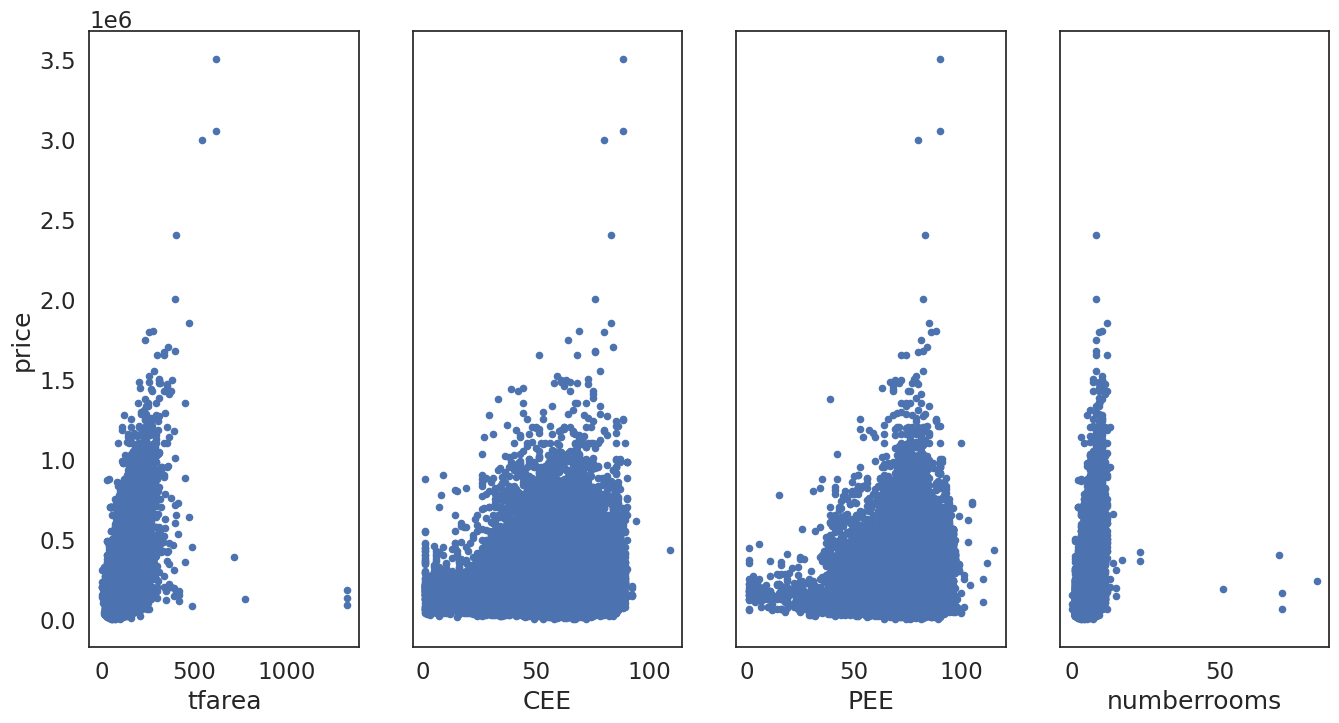

In [195]:
# Simple plot of the dataset
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='tfarea', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='CEE', y='price', ax=axs[1])
df.plot(kind='scatter', x='PEE', y='price', ax=axs[2])
df.plot(kind='scatter', x='numberrooms', y='price', ax=axs[3])

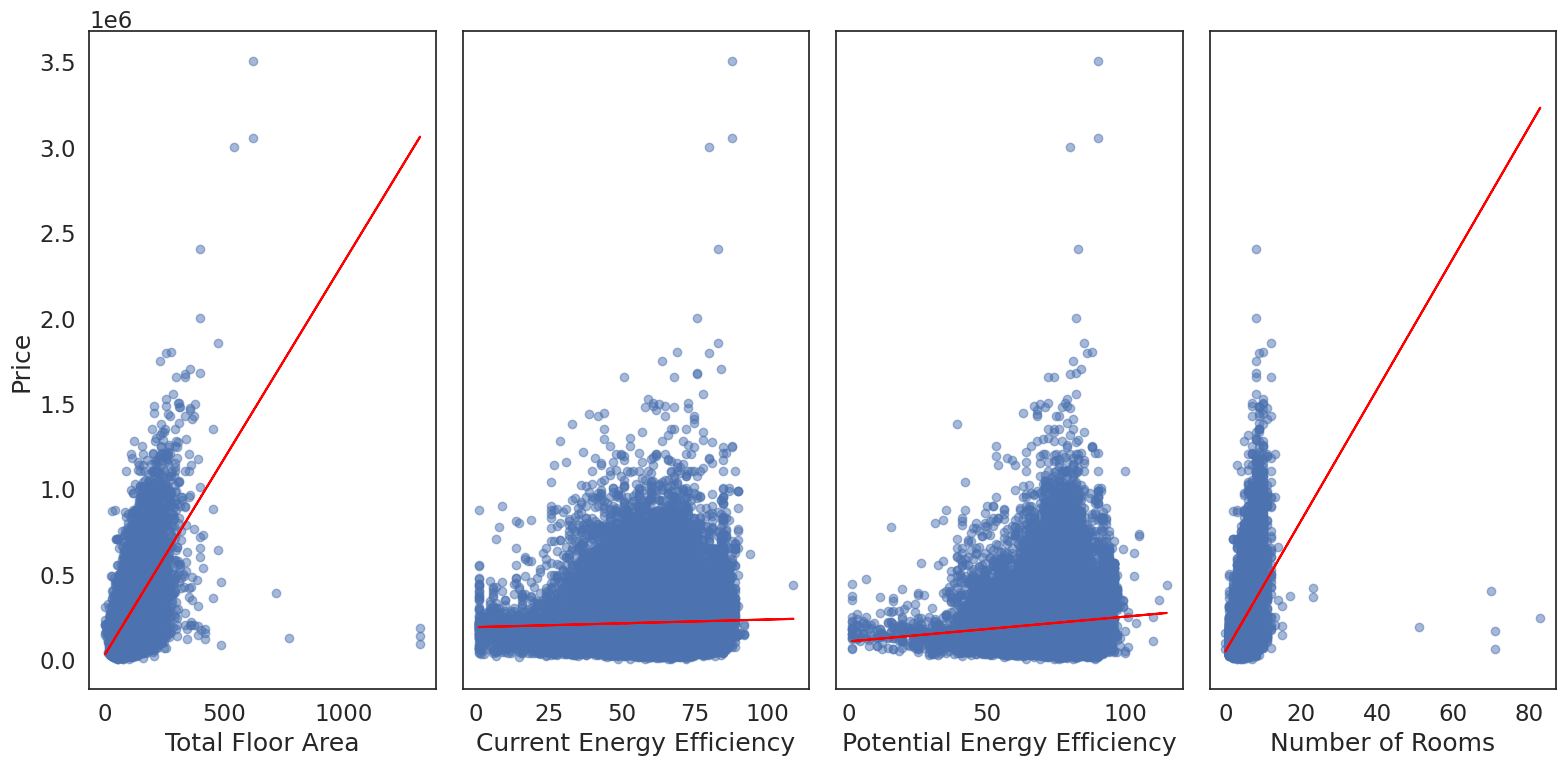

In [196]:
#Adding regression line to the plots
# Simple plot of the dataset
# using scatterplots to visualize the relationship between the features and the response 

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

# Ensure NaN values are dropped from both 'tfarea' and 'price' simultaneously
tfarea_clean = df[['tfarea', 'price']].dropna()
m, b = np.polyfit(tfarea_clean['tfarea'], tfarea_clean['price'], 1)
axs[0].scatter(tfarea_clean['tfarea'], tfarea_clean['price'], alpha=0.5)
axs[0].plot(tfarea_clean['tfarea'], m*tfarea_clean['tfarea'] + b, color='red')
axs[0].set_xlabel('Total Floor Area')
axs[0].set_ylabel('Price')

# Repeat for 'CEE' vs 'price'
cee_clean = df[['CEE', 'price']].dropna()
m, b = np.polyfit(cee_clean['CEE'], cee_clean['price'], 1)
axs[1].scatter(cee_clean['CEE'], cee_clean['price'], alpha=0.5)
axs[1].plot(cee_clean['CEE'], m*cee_clean['CEE'] + b, color='red')
axs[1].set_xlabel('Current Energy Efficiency')

# Repeat for 'PEE' vs 'price'
pee_clean = df[['PEE', 'price']].dropna()
m, b = np.polyfit(pee_clean['PEE'], pee_clean['price'], 1)
axs[2].scatter(pee_clean['PEE'], pee_clean['price'], alpha=0.5)
axs[2].plot(pee_clean['PEE'], m*pee_clean['PEE'] + b, color='red')
axs[2].set_xlabel('Potential Energy Efficiency')

# Repeat for 'numberrooms' vs 'price'
numberrooms_clean = df[['numberrooms', 'price']].dropna()
m, b = np.polyfit(numberrooms_clean['numberrooms'], numberrooms_clean['price'], 1)
axs[3].scatter(numberrooms_clean['numberrooms'], numberrooms_clean['price'], alpha=0.5)
axs[3].plot(numberrooms_clean['numberrooms'], m*numberrooms_clean['numberrooms'] + b, color='red')
axs[3].set_xlabel('Number of Rooms')

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


The Total Floor Area and number of rooms vs price plots show a positive correlation indicated by the upward trend of the regression line. This shows that as the total floor area increases, so does the house price. The CEE and PEE plots show a much flatter regression line indicating a weaker or potentially negligible linear relationship with house price.

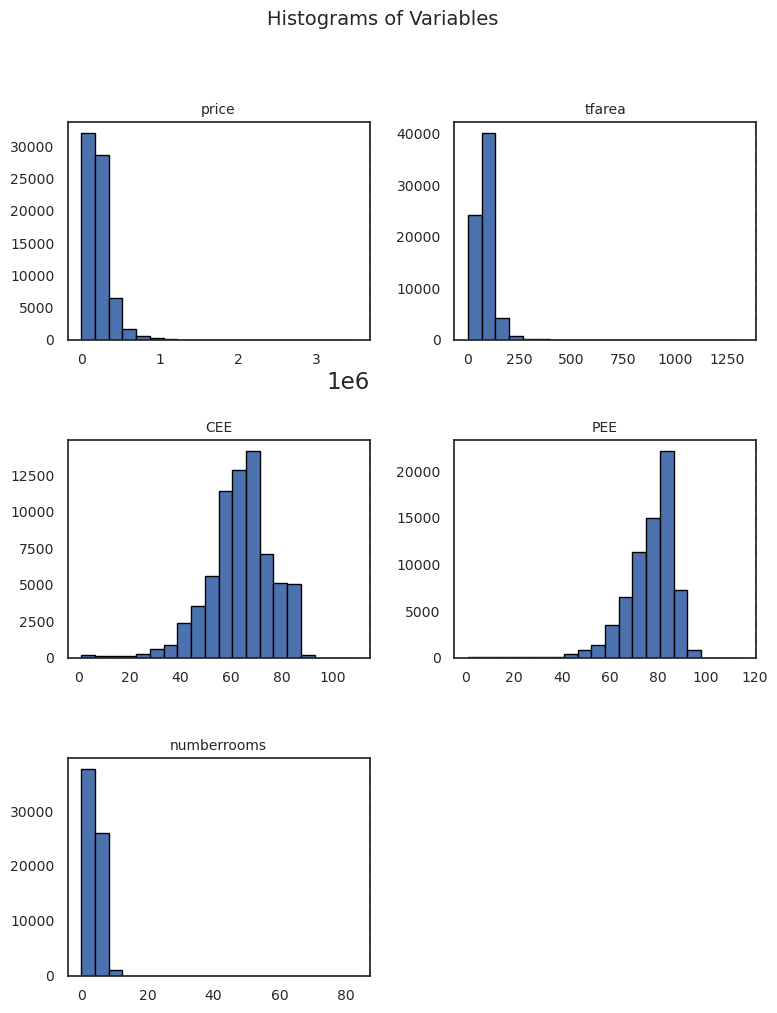

In [197]:
# Specifying the columns for the histograms
selected_columns = ['price', 'tfarea', 'CEE', 'PEE', 'numberrooms']
# Create histograms for the selected columns
ax = df[selected_columns].hist(figsize=(8, 10), bins=20, edgecolor='black', grid=False)  
# Specify the number of bins and edge color, and disable grid

# Adding title above the subplots
plt.suptitle('Histograms of Variables', y=1.02, fontsize=14)

# Set smaller labels for x and y axis, and for the title of each subplot
for axis_array in ax:
    for axis in axis_array:
        axis.set_title(axis.get_title(), fontsize=10)
        axis.tick_params(axis='x', labelsize=10)
        axis.tick_params(axis='y', labelsize=10)
        # Add a vertical line separating the bins
        axis.axvline(x=axis.get_xlim()[1], linestyle='dashed', linewidth=2)

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()


Some level of skewness can be observed in these various plots.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

Text(69.625, 0.5, 'House Price')

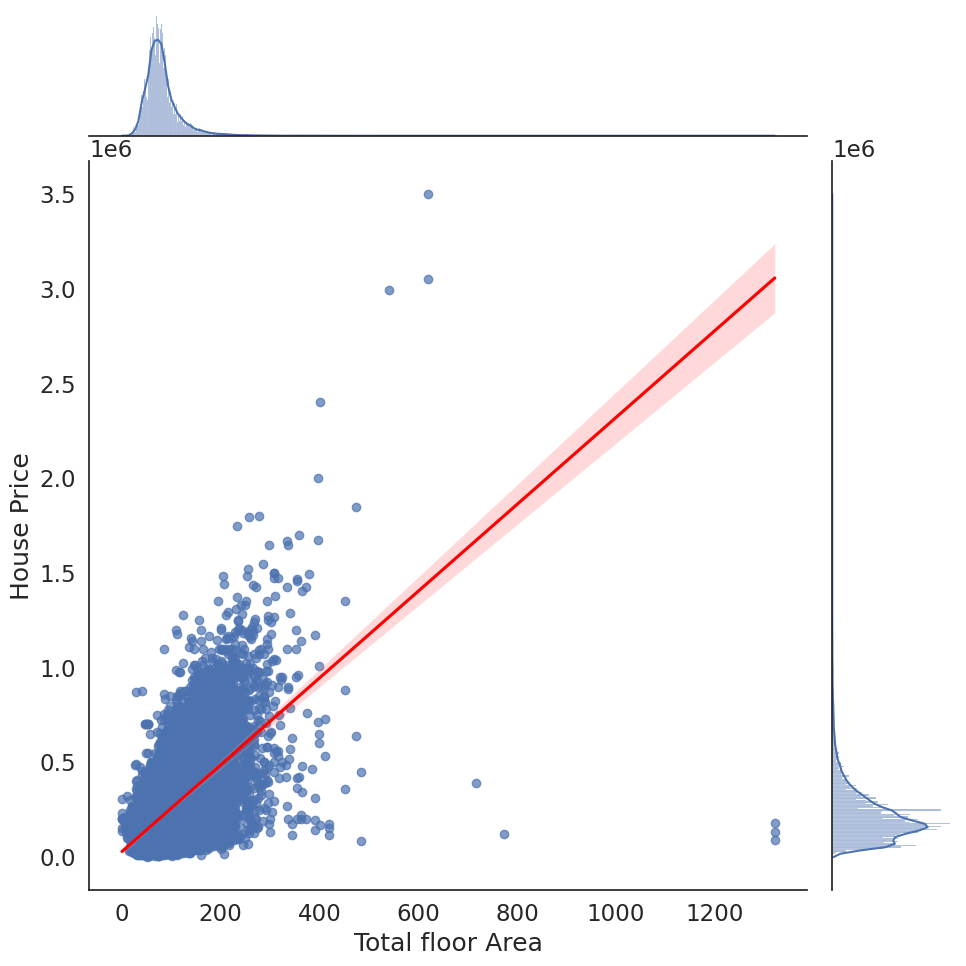

In [198]:
# scatter plots Joint visualisation 
# plot a scatterplot with a regression line and two histograms
sns.jointplot(data=df, # scatterplot with a regression line and two histograms
                x='tfarea', # set the x axis to tfarea
                y='price', # set the y axis to price
                kind="reg",  # set the kind of plot, regression
                scatter_kws=dict(alpha=0.7), # set the transparency to 0.7 (70%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # height of the plot to 10 inches 

plt.xlabel('Total floor Area') # add a label to the x axis
plt.ylabel('House Price') # add a label to the y axis

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

Text(69.625, 0.5, 'House Price')

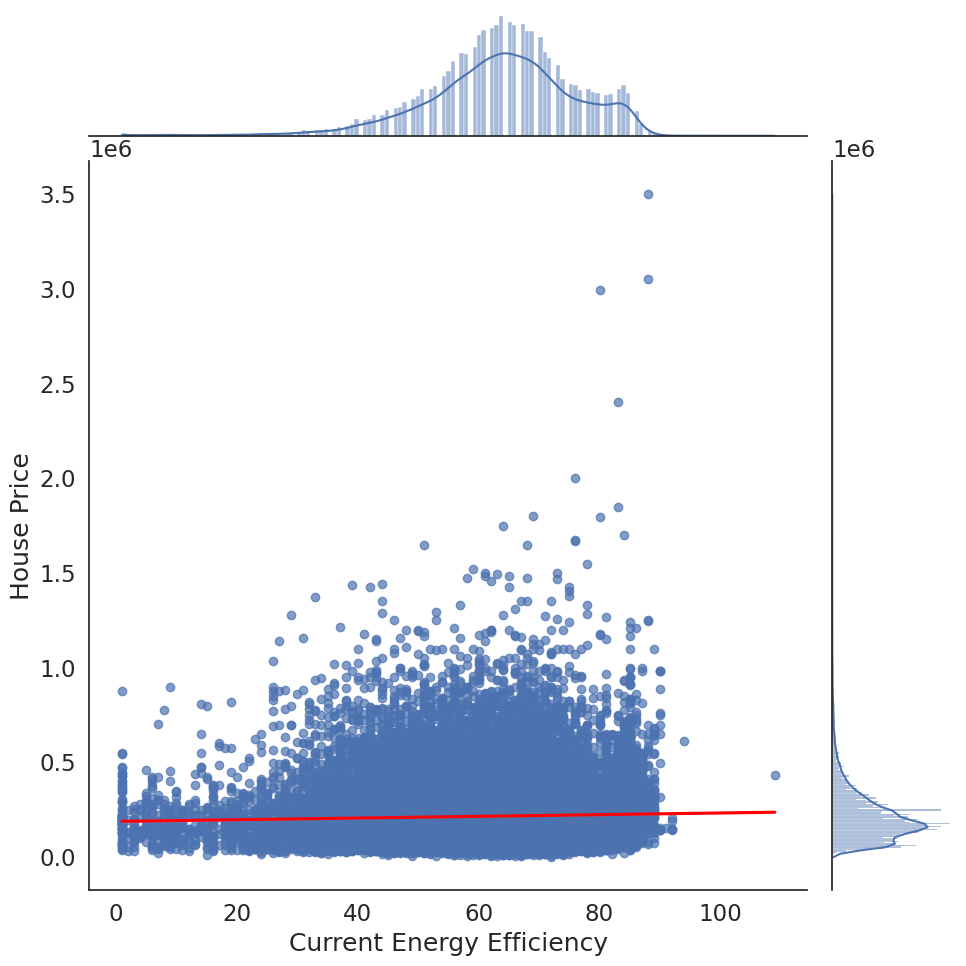

In [199]:
#scatter plots Joint visualisation 
# scatterplot with a regression line and two histograms
sns.jointplot(data=df, 
                x='CEE', # set the x axis to current energy efficiency
                y='price', # set the y axis the price
                kind="reg",  # set the regression plot
                scatter_kws=dict(alpha=0.7), # set transparency of points to 0.7 (70%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of plot to 10 inches 

plt.xlabel('Current Energy Efficiency') # add a label to the x axis
plt.ylabel('House Price') # add a label to the y axis

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

Text(69.625, 0.5, 'House Price')

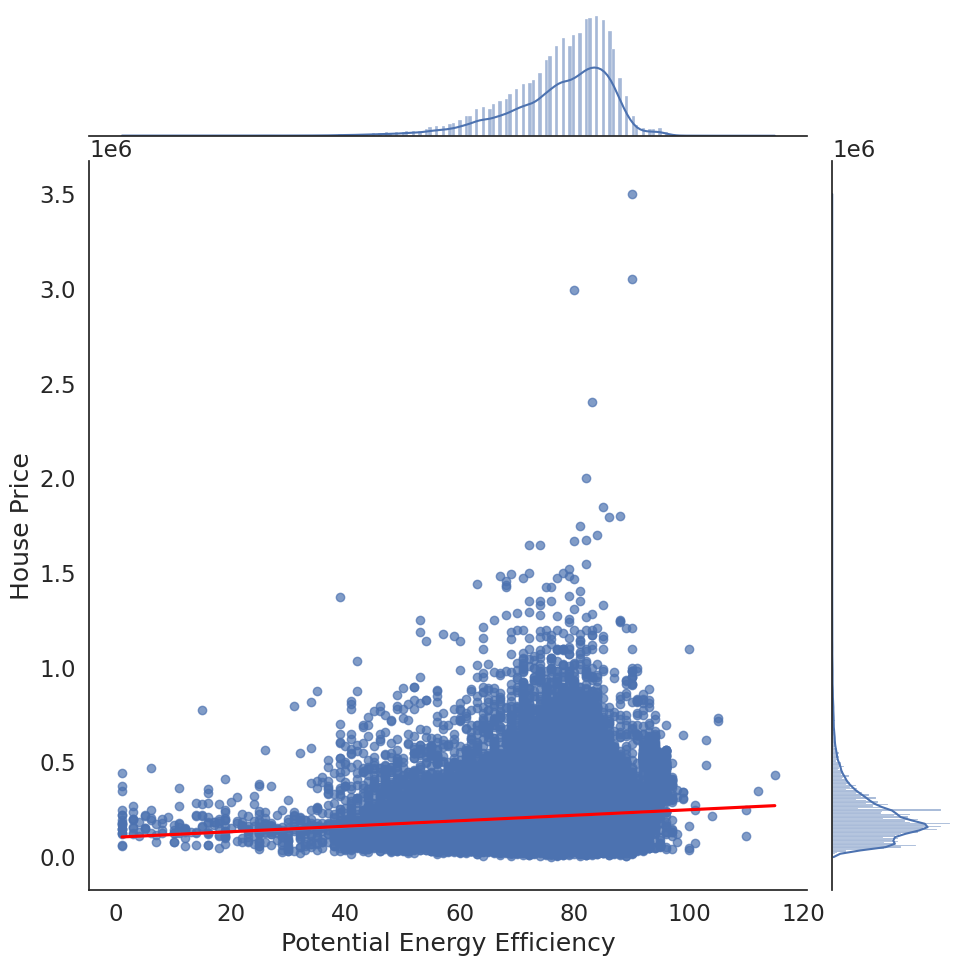

In [200]:
#scatter plots Joint visualisation 
# scatterplot with a regression line and two histograms
sns.jointplot(data=df,
                x='PEE', # set x axis to potential energy efficiency
                y='price', # set y axis to price
                kind="reg",  # set the regression plot
                scatter_kws=dict(alpha=0.7), # set the transparency of the points to 0.7 (70%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set height of the plot to 10 inches 

plt.xlabel('Potential Energy Efficiency') # add a label to the x axis
plt.ylabel('House Price') # add a label to the y axis

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

Text(69.625, 0.5, 'House Price')

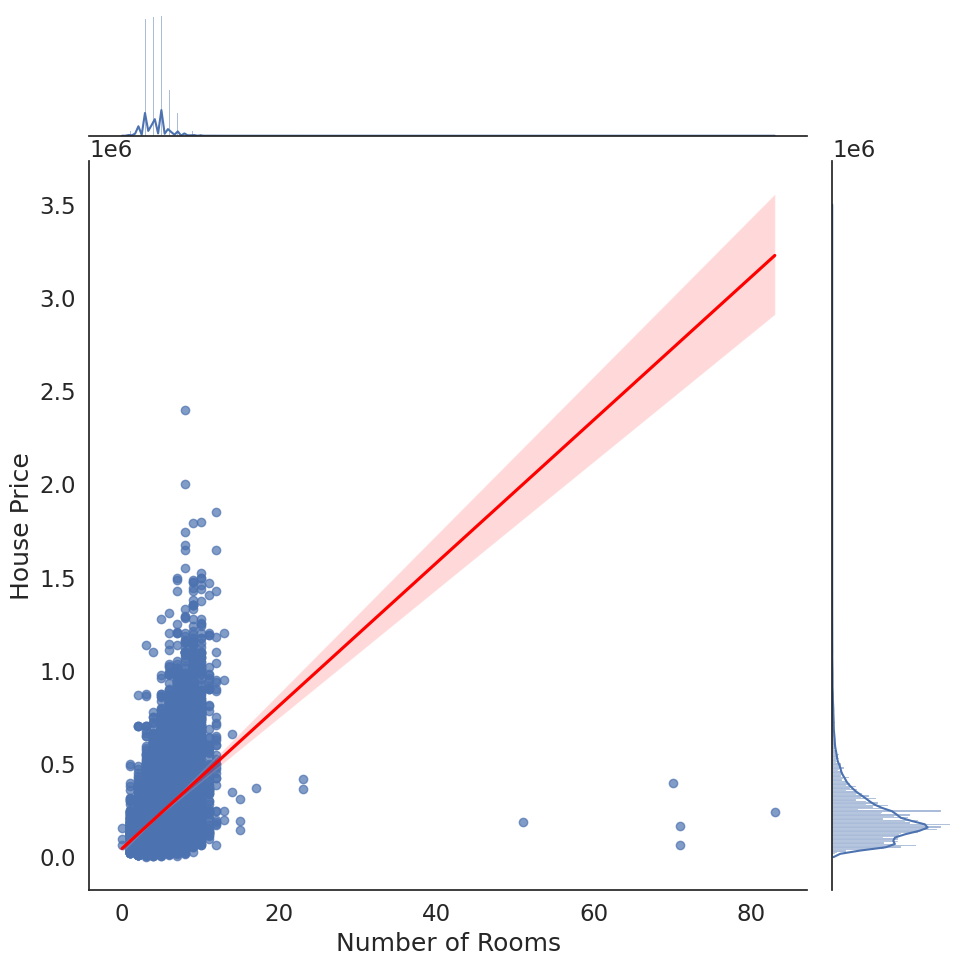

In [201]:
#scatter plots Joint visualisation 
# scatterplot with a regression line and two histograms
sns.jointplot(data=df, 
                x='numberrooms', # set x axis to number of rooms
                y='price', # set y axis to price
                kind="reg",  # set the regression plot
                scatter_kws=dict(alpha=0.7), # set the transparency of the points to be 0.7 (70%)
                line_kws=dict(color='red'), # set color of regression line to red
                height=10) # set height of plot to 10 inches 

plt.xlabel('Number of Rooms') # add a label to the x axis
plt.ylabel('House Price') # add a label to the y axis

### Visualising the trend of price per square meter and property price in Reading 

In [202]:
# Creating a new DataFrame with only 'year', 'priceper', and 'price' columns
time_df = df[['year', 'priceper', 'price']].copy()

# Display first 5 rows
print(time_df.head())

   year     priceper     price
0  2015  2876.543210  233000.0
1  2006  2283.333333  184950.0
2  2003  1728.333333  139995.0
3  1997  1349.380015  185000.0
4  2016  4609.589041  336500.0


In [203]:
# Convert the 'year' column to a datetime format
time_df['year'] = pd.to_datetime(time_df['year'].astype(str), format='%Y')

# Set the 'year' column as the DataFrame index
time_df.set_index('year', inplace=True)

In [204]:
time_df.head()

,priceper,price
year,,
2015-01-01,2876.543210,233000.0
2006-01-01,2283.333333,184950.0
2003-01-01,1728.333333,139995.0
1997-01-01,1349.380015,185000.0
2016-01-01,4609.589041,336500.0


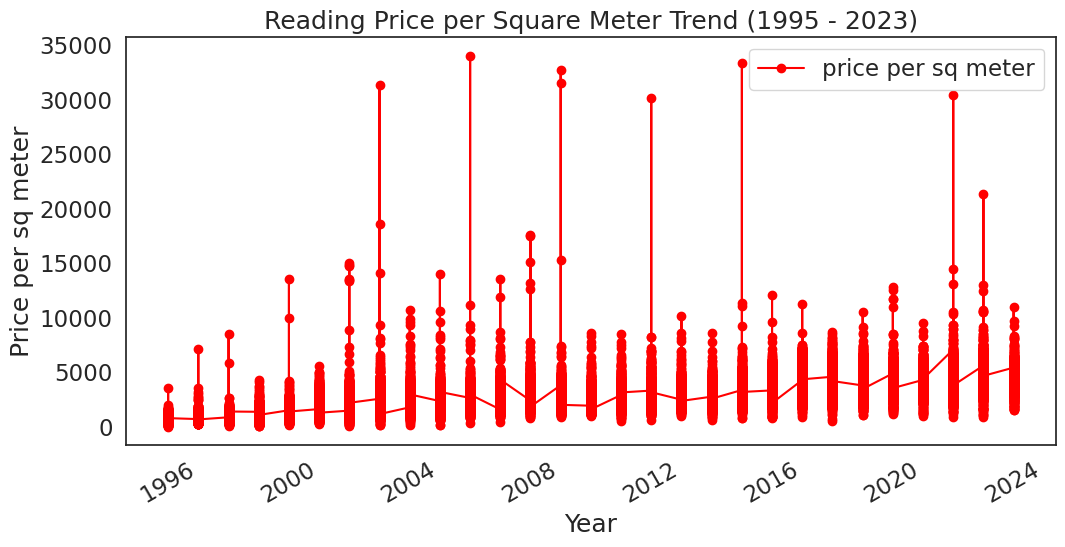

In [205]:
# Ensuring 'year' is set as the datetime index
if 'year' in time_df.columns:
    time_df['year'] = pd.to_datetime(time_df['year'], format='%Y')
    time_df.set_index('year', inplace=True)

# Plot the trend of 'price' over the years
plt.figure(figsize=(12, 6))
time_df['priceper'].plot(label='price per sq meter', marker='o', color='red')

# Customize the plot
plt.title('Reading Price per Square Meter Trend (1995 - 2023)')
plt.xlabel('Year')
plt.ylabel('Price per sq meter')
plt.legend()

# Show the plot
plt.show()

The plot shows the fluctuations in house price per square meter in Reading with records of high peaks in 2002, 2005, 2008, 2011, 2014, and 2021.

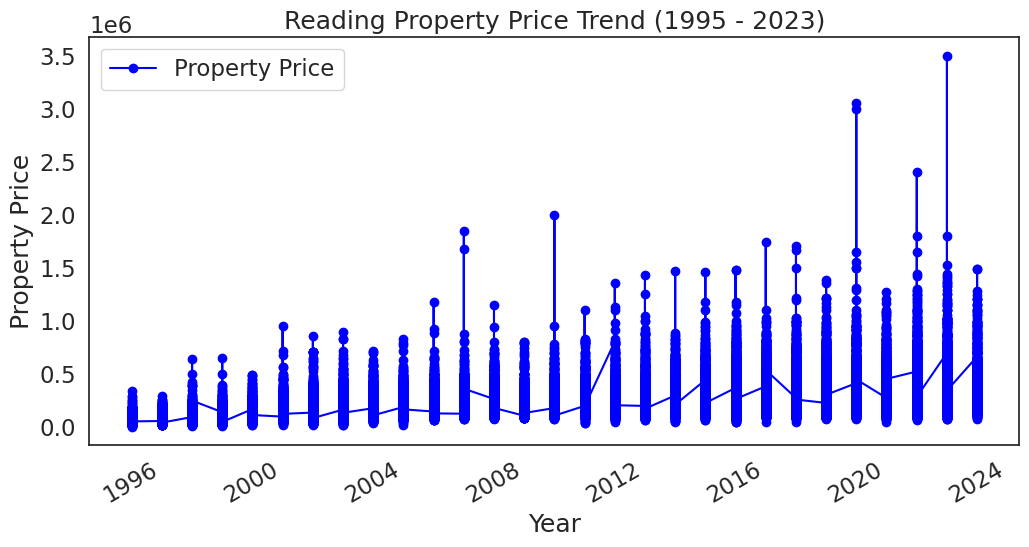

In [206]:
# Ensuring 'year' is set as the datetime index
if 'year' in time_df.columns:
    time_df['year'] = pd.to_datetime(time_df['year'], format='%Y')
    time_df.set_index('year', inplace=True)

# Plot the trend of 'price' over the years
plt.figure(figsize=(12, 6))
time_df['price'].plot(label='Property Price', marker='o', color='blue')

# Customize the plot
plt.title('Reading Property Price Trend (1995 - 2023)')
plt.xlabel('Year')
plt.ylabel('Property Price')
plt.legend()

# Show the plot
plt.show()

Reading recorded the highest house prices in 2019 and 2022. These two plots did not follow the same trend.

### Encoding Categorical Data
Column **duration:** where freehold (F)= 1 and leasehold (L)= 0

In [207]:

# Maping 'F' to 1 and 'L' to 0
df['duration_dummy'] = df['duration'].map({'F': 1, 'L': 0})

# Replace 'F' with 1 and 'L' with 0
df['duration_dummy'] = df['duration'].replace({'F': 1, 'L': 0})


In [208]:
#Confirming if it worked
# Print the first 10 rows of 'duration' and 'duration_dummy' columns
print(df[['duration', 'duration_dummy']].head(30))


   duration  duration_dummy
0         F               1
1         F               1
2         F               1
3         F               1
4         F               1
5         F               1
6         F               1
7         F               1
8         F               1
9         F               1
10        F               1
11        L               0
12        L               0
13        L               0
14        F               1
15        F               1
16        L               0
17        F               1
18        F               1
19        F               1
20        F               1
21        F               1
22        F               1
23        F               1
24        F               1
25        L               0
26        L               0
27        F               1
28        L               0
29        F               1


### Pearson Correlation 
 Assessing the correlation between variables before building the model.

In [209]:
# determining the Pearson correlation between the variables.
#only numerical variables
df.corr(numeric_only=True)

,priceper,year,price,id,tfarea,numberrooms,classt,CEE,PEE,duration_dummy
priceper,1.000000,0.776364,0.638666,0.025872,-0.105682,-0.066754,-0.028645,0.180096,0.128541,-0.128579
year,0.776364,1.000000,0.641412,0.022088,0.046973,0.042211,-0.046897,0.127012,0.157168,-0.020615
price,0.638666,0.641412,1.000000,0.028403,0.578339,0.459747,-0.090400,0.038919,0.100034,0.227255
id,0.025872,0.022088,0.028403,1.000000,0.010736,0.010574,-0.016300,0.032155,0.027543,0.003525
tfarea,-0.105682,0.046973,0.578339,0.010736,1.000000,0.745307,-0.107149,-0.127207,-0.008925,0.442803
numberrooms,-0.066754,0.042211,0.459747,0.010574,0.745307,1.000000,-0.126448,-0.200054,-0.049585,0.586954
classt,-0.028645,-0.046897,-0.090400,-0.016300,-0.107149,-0.126448,1.000000,-0.047339,-0.154523,-0.153735
CEE,0.180096,0.127012,0.038919,0.032155,-0.127207,-0.200054,-0.047339,1.000000,0.572032,-0.327571
PEE,0.128541,0.157168,0.100034,0.027543,-0.008925,-0.049585,-0.154523,0.572032,1.000000,0.019277
duration_dummy,-0.128579,-0.020615,0.227255,0.003525,0.442803,0.586954,-0.153735,-0.327571,0.019277,1.000000


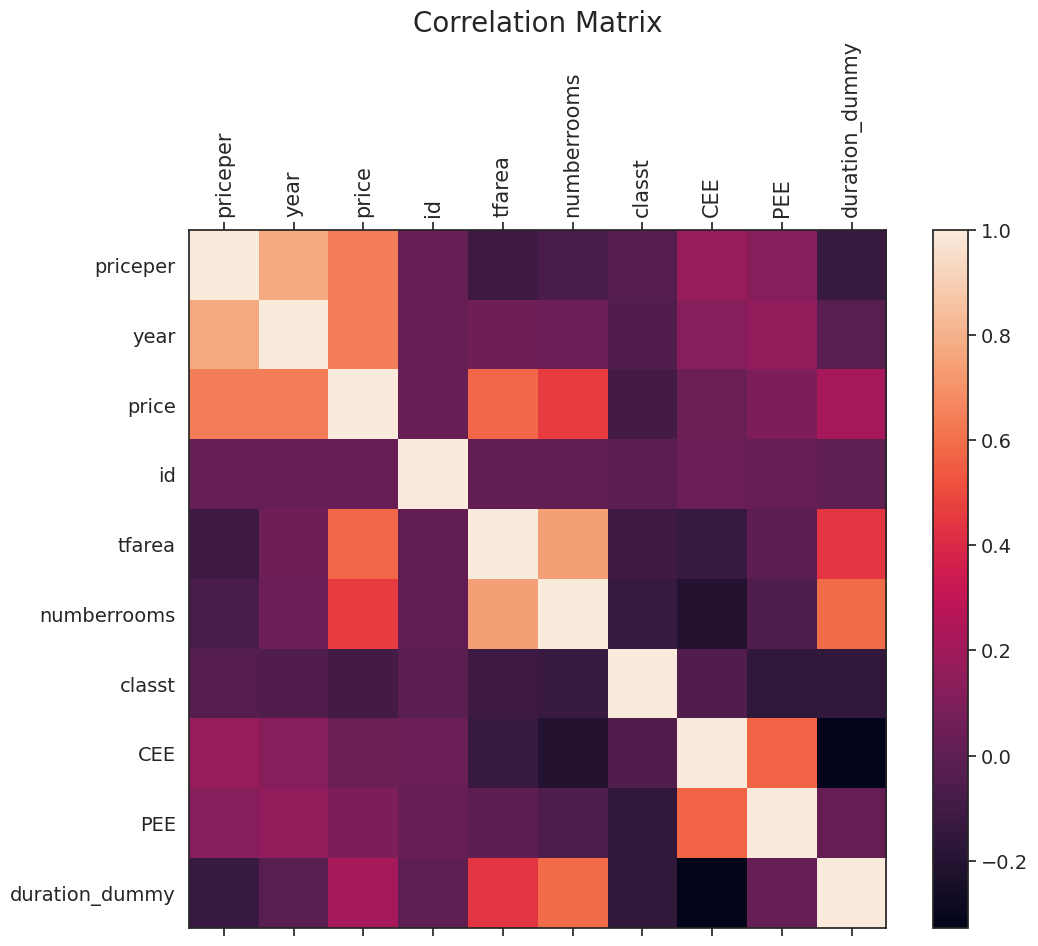

In [210]:
 # Select only numeric columns
df = df.select_dtypes(include=[np.number]) 

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 9))
plt.matshow(df.corr(), fignum=f.number)  # Use only numeric data for correlation matrix
plt.xticks(range(df.shape[1]), df.columns, fontsize=15, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [211]:

# List of columns excluded
exclude_columns = ['priceper', 'year', 'id', 'classt']

# Drop the columns specified in exclude_columns
df_numerical = df.drop(columns=exclude_columns)

# Determine the Pearson correlation between the remaining numerical variables
correlation_matrix = df_numerical.corr(numeric_only=True)

correlation_matrix


,price,tfarea,numberrooms,CEE,PEE,duration_dummy
price,1.000000,0.578339,0.459747,0.038919,0.100034,0.227255
tfarea,0.578339,1.000000,0.745307,-0.127207,-0.008925,0.442803
numberrooms,0.459747,0.745307,1.000000,-0.200054,-0.049585,0.586954
CEE,0.038919,-0.127207,-0.200054,1.000000,0.572032,-0.327571
PEE,0.100034,-0.008925,-0.049585,0.572032,1.000000,0.019277
duration_dummy,0.227255,0.442803,0.586954,-0.327571,0.019277,1.000000


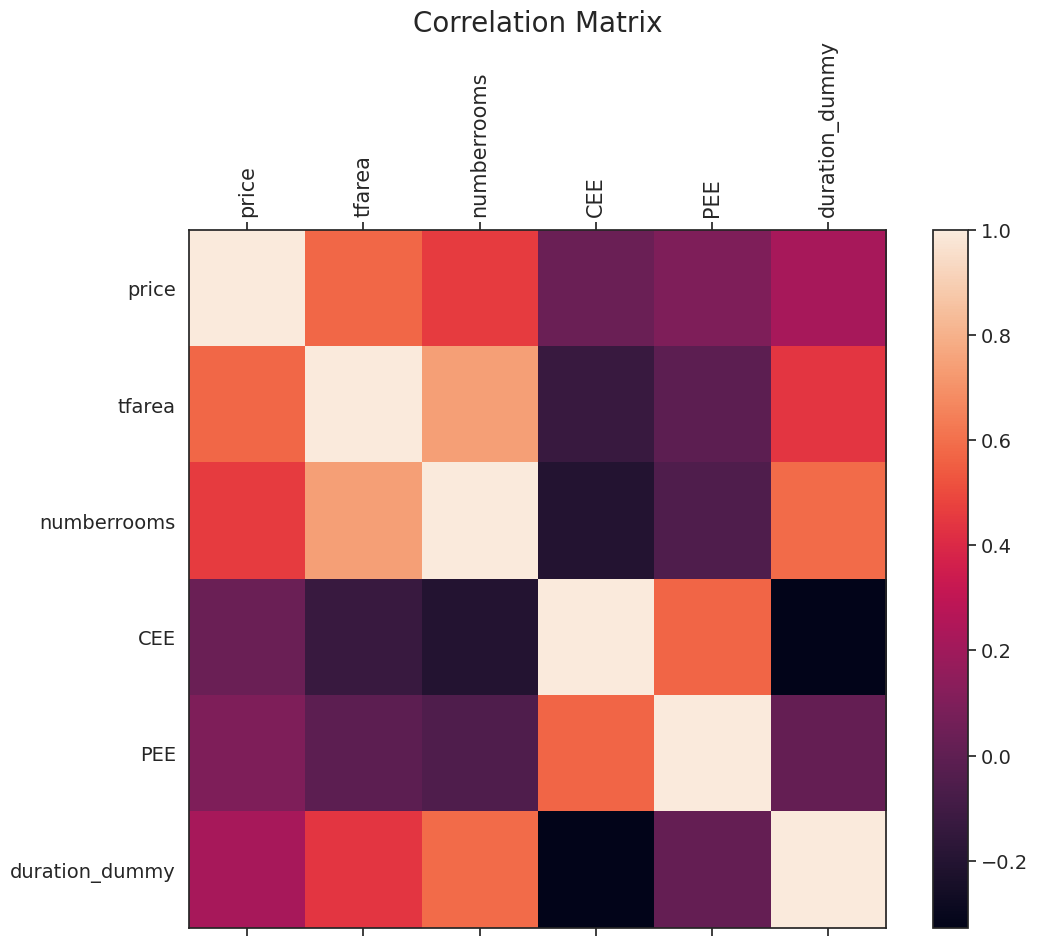

In [212]:
 # Select only numeric columns
df = df_numerical.select_dtypes(include=[np.number]) 

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 9))
plt.matshow(df_numerical.corr(), fignum=f.number)  # Use only numeric data for correlation matrix
plt.xticks(range(df_numerical.shape[1]), df_numerical.columns, fontsize=15, rotation=90)
plt.yticks(range(df_numerical.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

The Pearson correlation matrix shows minimal existence of multicollinearity but it will be further explored using the regression **condition number**, and resolved with **Variance Inflation Factor(VIF)**

### Analysis: Building Multiple Regression

In [213]:
# Creat a new_df
# List of columns to include in the new df
columns = ['price', 'tfarea', 'numberrooms', 'CEE', 'PEE', 'duration_dummy']

# Create the new df 
new_df = df[columns].copy()

new_df.head()  #check first 5 rows


,price,tfarea,numberrooms,CEE,PEE,duration_dummy
0,233000.0,81.0,3.0,51,80,1
1,184950.0,81.0,3.0,51,80,1
2,139995.0,81.0,3.0,51,80,1
3,185000.0,137.1,8.0,66,73,1
4,336500.0,73.0,4.0,66,87,1


### Taking care of major outliers before model building

Particularly, the unrealistic minimum house price of **£400.00**

In [214]:
#Handling the outlier in the price column
# Get the top 10 minimum values in the price column
top_10_min_prices = new_df.nsmallest(10, 'price')

# Display only the price column
print(top_10_min_prices['price'])

52446      400.0
905       5000.0
10634     5000.0
10926     5000.0
32515     5000.0
51011     5000.0
33446     6000.0
6265      7000.0
13226    10500.0
57401    10500.0
Name: price, dtype: float64


We see above that about 7 prices seem not be realistic so we will exclude them in the model

In [215]:
# Remove the top 10 lowest values in the price column
new_df = new_df.drop(new_df.nsmallest(8, 'price').index)

In [216]:
#Handling the outlier in the price column
# Get the top 10 minimum values in the price column
top_10_min_prices = new_df.nsmallest(10, 'price')

# Display only the price column
print(top_10_min_prices['price'])

13226    10500.0
57401    10500.0
49681    11000.0
56765    11000.0
9240     11500.0
9567     11500.0
3207     12000.0
18882    12000.0
30418    12000.0
36979    12000.0
Name: price, dtype: float64


In [217]:
# Get the top 10 highest values in the price column
top_10_max_prices = new_df.nlargest(10, 'price')

# Display only the price column
print(top_10_max_prices['price'])

18090    3500000.0
18089    3050000.0
56375    2995000.0
56133    2400000.0
56141    2000000.0
56184    1850000.0
29912    1800000.0
56131    1795000.0
56202    1746000.0
15378    1700000.0
Name: price, dtype: float64


In [218]:
# Identify the indices of the top 10 highest price values
top_10_max_indices = new_df.nlargest(10, 'price').index

# Drop those rows from the DataFrame
new_df = new_df.drop(index=top_10_max_indices)

# Optional: Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(new_df.head())

      price  tfarea  numberrooms  CEE  PEE  duration_dummy
0  233000.0    81.0          3.0   51   80               1
1  184950.0    81.0          3.0   51   80               1
2  139995.0    81.0          3.0   51   80               1
3  185000.0   137.1          8.0   66   73               1
4  336500.0    73.0          4.0   66   87               1


In [219]:
# Droping rows with NaN or infinite values in 'price' or any feature column
new_df = new_df.dropna(subset=['price', 'tfarea', 'CEE', 'PEE', 'numberrooms'])

In [220]:
# Select independent variables
X = new_df[['tfarea', 'numberrooms', 'CEE', 'PEE', 'duration_dummy']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define dependent variable
y = new_df['price']

# Fit the OLS model
model_price = sm.OLS(y, X).fit()

# View model summary
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     6594.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:53:31   Log-Likelihood:            -8.4539e+05
No. Observations:               64703   AIC:                         1.691e+06
Df Residuals:                   64697   BIC:                         1.691e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.774e+04   3840.196    -17.

The high condition number, **`1.12e+03`** indicates strong multicollinearity. 

### Using VIF to deal with multicollinearity

Here we introduce VIF to automatically deal with multicollinearity.

`Variance Inflation Factor` (VIF) measures multicollinearity among predictors within a multiple regression. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. More explanation of the theory can be found [here](https://online.stat.psu.edu/stat501/lesson/12/12.4). 

$$\large VIF_j=\frac{1}{1-R_{j}^{2}}$$

Note that the `statsmodels` package is used

In [221]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

'''
Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant is added to the variance_inflation_factor if not the results will be incorrect

 Using a df containing only the predictor features, not the response variable
set threshold: (default 5) the threshold VIF value. Thus, if the VIF of a variable is greater than threshold, it should be removed from df
and return df with multicollinear features removed.
'''
# Define the features for VIF calculation
features = ['tfarea', 'numberrooms', 'CEE', 'PEE', 'duration_dummy']

# Add a constant to the features since VIF computation requires it
X = add_constant(new_df[features])

# Create a df to hold feature names and their VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Initial VIF values:")
print(vif_data)

# Continue iteratively removing features with VIF greater than the threshold
while vif_data[vif_data['Feature'] != 'const']['VIF'].max() > 5:
    # Find the feature with the maximum VIF
    remove = vif_data.sort_values('VIF', ascending=False).iloc[0]
    if remove['Feature'] == 'const':
        break
    
    # Drop the feature with highest VIF
    X = X.drop(columns=remove['Feature'])
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print(f"\nDropping '{remove['Feature']}' with VIF: {remove['VIF']}")
    print(vif_data)
    
print("\nFinal set of features after VIF reduction:")
print(vif_data)


Initial VIF values:
          Feature        VIF
0           const  73.009547
1          tfarea   2.252492
2     numberrooms   2.806092
3             CEE   1.674152
4             PEE   1.522106
5  duration_dummy   1.723036

Final set of features after VIF reduction:
          Feature        VIF
0           const  73.009547
1          tfarea   2.252492
2     numberrooms   2.806092
3             CEE   1.674152
4             PEE   1.522106
5  duration_dummy   1.723036


The `VIF with threshold = 5` confirms the minimal multicollinearity between the independent variables. However, `log transformation` is used to address other numerical problems.

In [222]:
#Printing the OLS model
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     6594.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:53:32   Log-Likelihood:            -8.4539e+05
No. Observations:               64703   AIC:                         1.691e+06
Df Residuals:                   64697   BIC:                         1.691e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.774e+04   3840.196    -17.

### Fishing Out Matrices

In [223]:

# Extract intercept and coefficients
intercept, *coefficients = model_price.params

# Extract p-values
p_values = model_price.pvalues

# Print the regression equation and statistics
print(f"y = {intercept:.3f} + {coefficients[0]:.3f} * X1 + ... + {coefficients[-1]:.3f} * Xn")
print(f"R^2 = {model_price.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.5f}")

# Assuming you have 5 predictors
feature_names = ['tfarea', 'numberrooms', 'CEE', 'PEE', 'duration_dummy']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.5f}")


y = -67736.911 + 2017.141 * X1 + ... + -8232.335 * Xn
R^2 = 0.33759
p-value of intercept = 0.00000
p-value of tfarea = 0.00000
p-value of numberrooms = 0.00000
p-value of CEE = 0.10778
p-value of PEE = 0.00000
p-value of duration_dummy = 0.00000


/tmp/ipykernel_299/1819766287.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.5f}")
/tmp/ipykernel_299/1819766287.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.5f}")


### Residual Analysis

Conducting residual analysis to review the regression assumptions using the `residuals vs. fitted plot`, `residual histogram plot` and `QQ plot`.
  

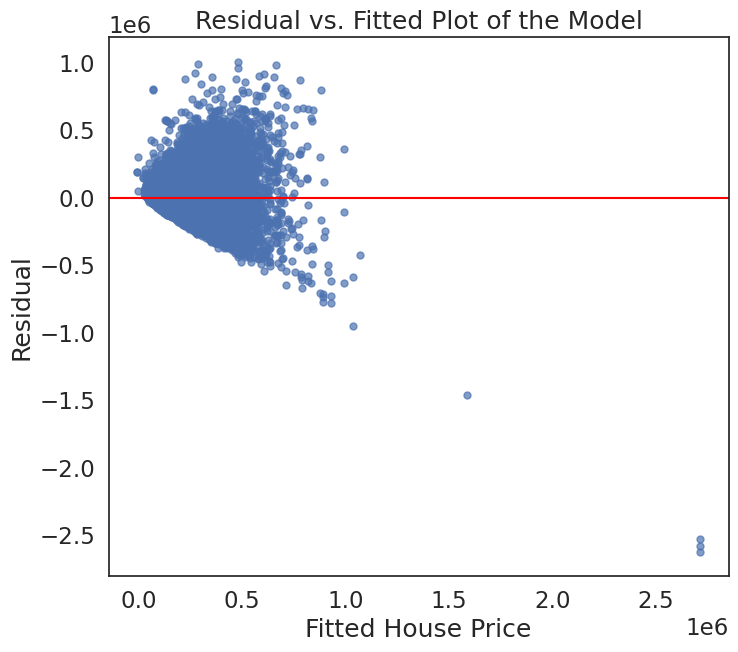

In [224]:
# Set the figure size
plt.figure(figsize=(8, 7))

# Scatter plot of fitted values vs residuals
plt.scatter(model_price.fittedvalues, model_price.resid, alpha=0.7, s=25)

# Add title and labels
plt.xlabel('Fitted House Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of the Model')

# Add a reg line at y=0, color, red
plt.axhline(y=0, color='red', linestyle='-')

plt.show()


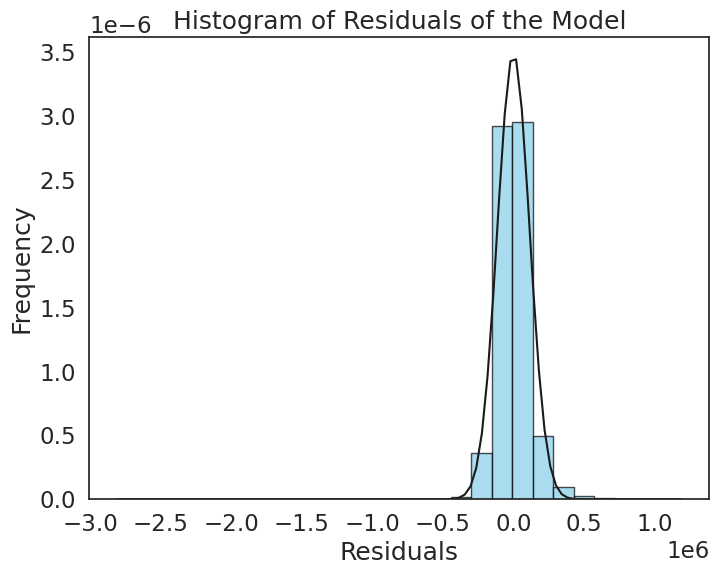

In [225]:
#Histogram plot of the model 
residuals = model_price.resid

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(residuals, bins=25, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Calculate the normal distribution with the same mean and std as the residuals
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=1.5)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Model')

# Display the plot
plt.show()

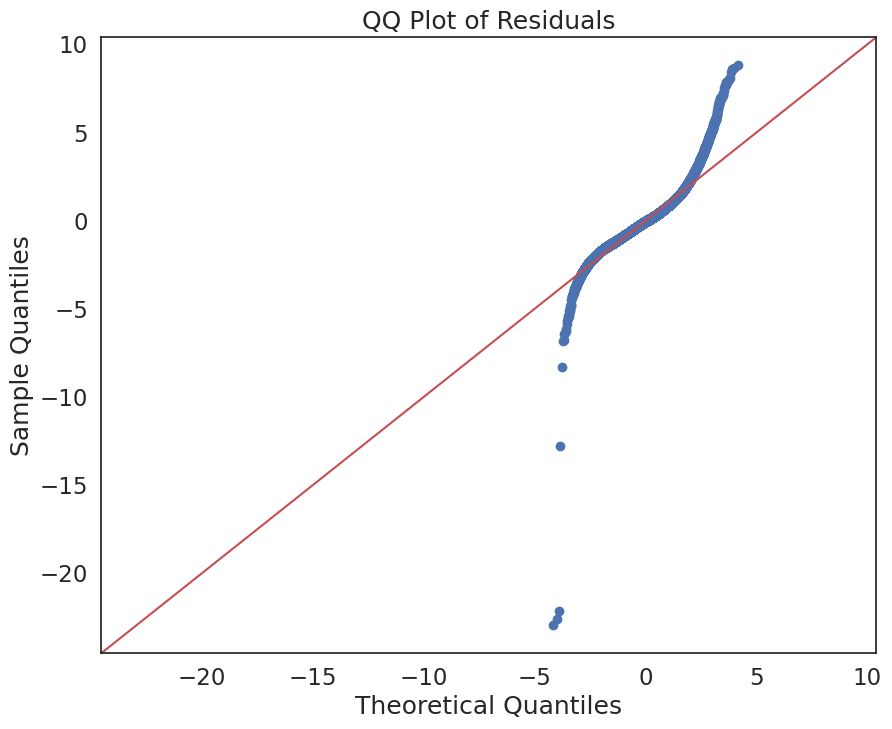

In [226]:
# QQ plot of residuals
fig = sm.qqplot(model_price.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Display the plot
plt.show()

### Log Transformation of the Model 


In [227]:
#Printing the regression model
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     6594.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:53:34   Log-Likelihood:            -8.4539e+05
No. Observations:               64703   AIC:                         1.691e+06
Df Residuals:                   64697   BIC:                         1.691e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.774e+04   3840.196    -17.

In [228]:
# Take variables and produce logarithms of them
x_variables = ["price", "tfarea", "numberrooms", "CEE", "PEE"]  #excluding dummy variable
log_x_vars = []
for x in x_variables:
    new_df[f"log_{x}"] = np.log(new_df[x])
    log_x_vars.append(f"log_{x}")

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [229]:
new_df.head()

,price,tfarea,numberrooms,CEE,PEE,duration_dummy,log_price,log_tfarea,log_numberrooms,log_CEE,log_PEE
0,233000.0,81.0,3.0,51,80,1,12.358794,4.394449,1.098612,3.931826,4.382027
1,184950.0,81.0,3.0,51,80,1,12.127841,4.394449,1.098612,3.931826,4.382027
2,139995.0,81.0,3.0,51,80,1,11.849362,4.394449,1.098612,3.931826,4.382027
3,185000.0,137.1,8.0,66,73,1,12.128111,4.920711,2.079442,4.189655,4.290459
4,336500.0,73.0,4.0,66,87,1,12.726353,4.290459,1.386294,4.189655,4.465908


In [230]:
#Building the log transformed model
# handle zero or negative values which cannot be log-transformed
new_df['log_tfarea'] = np.log(new_df['tfarea'].clip(lower=1))
new_df['log_numberrooms'] = np.log(new_df['numberrooms'].clip(lower=1))
new_df['log_CEE'] = np.log(new_df['CEE'].clip(lower=1))
new_df['log_PEE'] = np.log(new_df['PEE'].clip(lower=1))
new_df['log_price'] = np.log(new_df['price'].clip(lower=1))

# Removing any infinite or NaN values that could cause numerical issues
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.dropna(inplace=True)

# Select independent variables
X = new_df[['log_tfarea', 'log_numberrooms', 'log_CEE', 'log_PEE', 'duration_dummy']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define dependent variable
y = new_df['log_price']

# Fit the OLS model
log_model_price = sm.OLS(y, X).fit()

# View summary of the model
print(log_model_price.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4110.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:53:34   Log-Likelihood:                -53964.
No. Observations:               64703   AIC:                         1.079e+05
Df Residuals:                   64697   BIC:                         1.080e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4643      0.063    1

The minimal condition number of **`222`** indicates that issues of multicollinearity and other data issues  have been mitigated. However, the model's explanation power reduced from $R^2$= `0.338` to `0.241`. 

### Fishing Out Matrices

In [231]:
# Extract intercept and coefficients
intercept, *coefficients = log_model_price.params

# Extract the p-values
p_values = log_model_price.pvalues

# Print the reg. equation and statistics
print(f"y = {intercept:.3f} + {coefficients[0]:.3f} * X1 + ... + {coefficients[-1]:.3f} * Xn")
print(f"R^2 = {log_model_price.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.5f}")

# with 5 predictors
feature_names = ['log_tfarea', 'log_numberrooms', 'log_CEE', 'log_PEE', 'duration_dummy']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.5f}")

y = 7.464 + 0.822 * X1 + ... + -0.059 * Xn
R^2 = 0.24105
p-value of intercept = 0.00000
p-value of log_tfarea = 0.00000
p-value of log_numberrooms = 0.00003
p-value of log_CEE = 0.25666
p-value of log_PEE = 0.00000
p-value of duration_dummy = 0.00000


/tmp/ipykernel_299/1957991560.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.5f}")
/tmp/ipykernel_299/1957991560.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.5f}")


 ### Residual Plot of log-Transformed Model

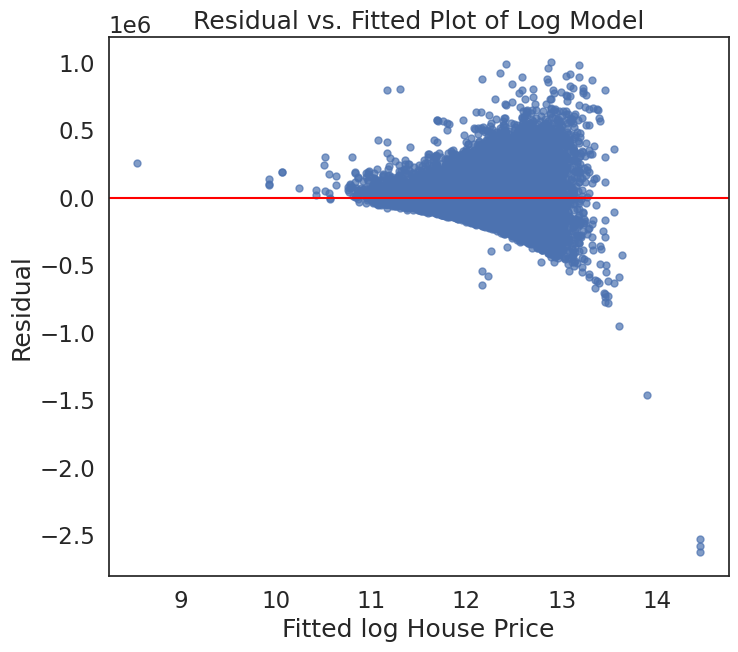

In [232]:
#Scatter plot of log_model
# Set figure size
plt.figure(figsize=(8, 7))

# Scatter plot fitted values vs residuals
plt.scatter(log_model_price.fittedvalues, model_price.resid, alpha=0.7, s=25)

# Add title and labels
plt.xlabel('Fitted log House Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Log Model')

# Add a horizontal line at y=0, color = red
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

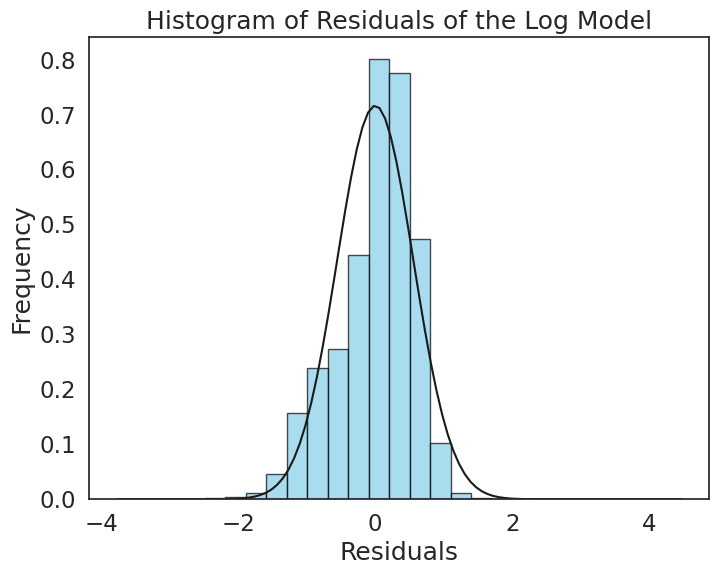

In [233]:
#Histogram plot of the log-transformed model

residuals = log_model_price.resid

# Set figure size
plt.figure(figsize=(8, 6))  

# Plot histogram
plt.hist(residuals, bins=25, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Calculate the normal distribution with same mean and std as the residuals
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)

# Plot normal distribution curve
plt.plot(x, p, 'k', linewidth=1.5)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Log Model')

# Display the plot
plt.show()

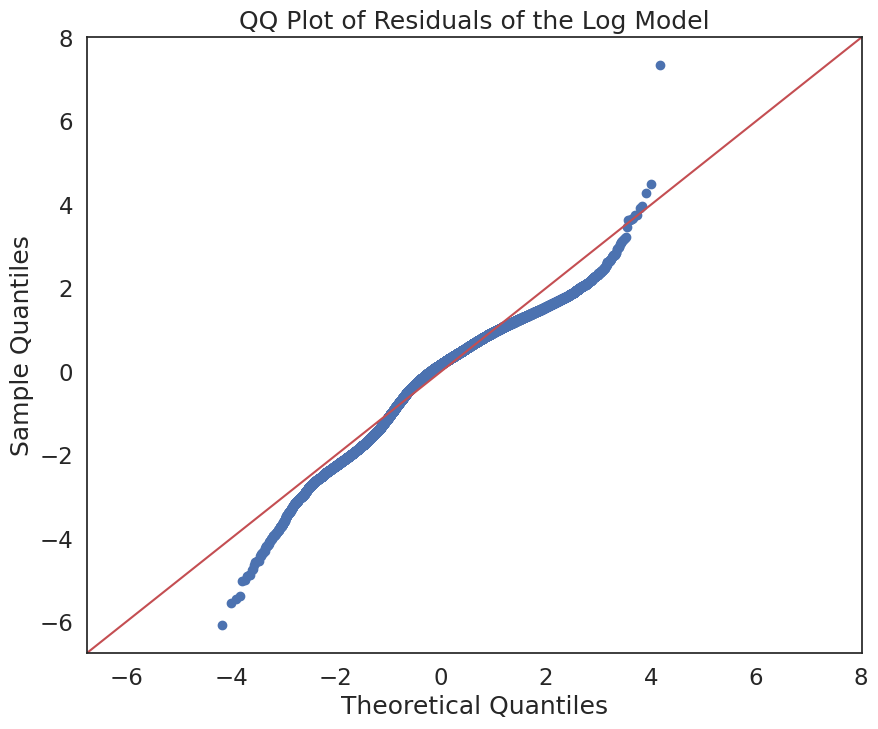

In [234]:
# QQ plot of the log model

fig = sm.qqplot(log_model_price.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals of the Log Model')

# Display the plot
plt.show()

###  Random Forest Regressor and diagnostic metrics

Assessing OLS and Machine Learning model performance.

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select independent variables and dependent variable
X = new_df[['log_tfarea', 'log_numberrooms', 'log_CEE', 'log_PEE', 'duration_dummy']]  # predictors
y = new_df['log_price']  # response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           random_state=42,
                           max_features='sqrt',
                           max_depth=None,
                           min_samples_split=2,
                           min_samples_leaf=1)

# Fit model on training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Compute MSE
rmse = np.sqrt(mse)  # Compute RMSE
r2 = r2_score(y_test, y_pred)  # R² score

# Print out metrics
print("Random Forest Regression Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Feature/variable importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("Feature Importances:")
for name, importance in sorted_features:
    print(f"{name}: {importance:.4f}")

Random Forest Regression Performance:
Root Mean Squared Error (RMSE): 0.59
R^2 Score: 0.1534
Feature Importances:
log_tfarea: 0.4630
log_CEE: 0.2288
log_PEE: 0.1620
log_numberrooms: 0.1207
duration_dummy: 0.0255


The Random Forest model provided some insight into the factors affecting house prices, its overall predictive power is relatively low (**$R^2$ = 0.1534**), suggesting the need for further model tuning or including additional relevant features. RMSE value confirms that the model's predictions are moderately close to the actual data points but could be improved. 

In [237]:
#Comparing OLS and Random Forest performance
# Select independent variables and dependent variable
X = new_df[['log_tfarea', 'log_numberrooms', 'log_CEE', 'log_PEE', 'duration_dummy']]  # predictors
y = new_df['log_price']  # response variable

# Split data into training and testing sets for a fair model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% training, 25% test

# Initialize the Linear Regression and Random Forest models
ols_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
ols_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
ols_predictions = ols_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Diagnostic metrics function
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, rmse

ols_metrics = calculate_metrics(y_test, ols_predictions)
rf_metrics = calculate_metrics(y_test, rf_predictions)

# Print metrics
print("OLS Metrics:")
print(f"R2: {ols_metrics[0]:.4f}")
print(f"RMSE: {ols_metrics[1]:.4f}")

print("\nRandomForest Metrics:")
print(f"R2: {rf_metrics[0]:.4f}")
print(f"RMSE: {rf_metrics[1]:.4f}")


OLS Metrics:
R2: 0.2444
RMSE: 0.5596

RandomForest Metrics:
R2: 0.1484
RMSE: 0.5940


The OLS model has a higher $R^2$ value than the Random Forest model indicating that it generally performs better in explaining the variation in house prices in Reading by the predictors. The OLS model shows a more reliable prediction in this particular case, supported by the lower RMSE value of OLS.

##  Findings and Discussions

The regression before and log transformation models both show that the total floor area, number of rooms, potential energy efficiency rating, and the property's legal duration significantly impact house prices in Reading. This is evident in the `P-values = 0.000` of these variables less than a `5%` significant level and the absolute `t-values` greater than `1.96` statistical considerable level. However, the `p-values` and `t-values` for `current energy efficiency` ratings in both models surpass the significance thresholds, indicating a lack of significant on house prices in Reading. The coefficients of the independent variables coupled with the Pearson correlation matrix illustrate a positive relationship on price but the legal duration has a negative effect.

The coefficients of the log-transformed model illustrate that having a unit increase in total floor area, number of bedrooms, and potential energy efficiency attract a `0.8219,` `0.0484,` and `0.2227` increase in the house price in Reading, ceteris paribus. Additionally, a leasehold attracts a `-0.0587`, all things being equal. 

The $𝑅^2$= `0.241` indicates the explanatory power of the transformed model. Thus, `24.10%` of the variation in property prices in Reading is explained by the independent variables, Ceteris paribus. The natural log transformation was performed to normalize the data and have a more accurate and reliable result.
.



### Discussion of the four conditions

- **Linear relationship:** All the points in the residual plot are not randomly scattered around the x-axis (residual=0). Therefore, it looks like the linear relationship between the variables is not satisfied and this is also evident in the `QQ plot.`

- **Independent errors:** The points in the residual plot are not randomly distributed and some patterns can be seen. Therefore, it is unlikely that the errors are independently distributed.

- **Normally distributed errors:** The histogram is asymmetric and shows some level of skewness. The `QQ plot` shows that the residuals slightly deviate from the theoretical quantiles. This suggests the data does not perfectly fit the assumed normal distribution, especially at the ends. Therefore, it is not likely that the residuals are normally distributed.

- **Equal variance:** the points do not form a horizontal band around residual=0, and the range of residuals increases with the fitted y value. Therefore, it is also unlikely that the residuals have equal variance.

### Hypothesis Testing

**Test 1 - Means Comparison Test:** the sample size (69649) is fairly large so the mean comparison test can be used.
Could they be drawn from populations with the same mean?

In [238]:
# Set significance level

alpha = 0.05

In [239]:

# Identify numeric columns
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

# Iterate over pairs of numeric columns
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]

        # Calculate standard deviations
        std1 = new_df[col1].std()
        std2 = new_df[col2].std()

        # Calculate the ratio
        std_ratio = std1 / std2
        print(f"Standard deviation ratio for {col1} and {col2} = {std_ratio}")

        # Check if standard deviations can be assumed equal
        if 0.5 < std_ratio < 2:
            print(f"Can assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = True
        else:
            print(f"Cannot assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = False


Standard deviation ratio for price and tfarea = 3897.1265144946956
Cannot assume equal population standard deviations for price and tfarea.
Standard deviation ratio for price and numberrooms = 82795.93866348204
Cannot assume equal population standard deviations for price and numberrooms.
Standard deviation ratio for price and CEE = 11812.120793506252
Cannot assume equal population standard deviations for price and CEE.
Standard deviation ratio for price and PEE = 14184.492752110515
Cannot assume equal population standard deviations for price and PEE.
Standard deviation ratio for price and duration_dummy = 306289.8248030176
Cannot assume equal population standard deviations for price and duration_dummy.
Standard deviation ratio for price and log_price = 219621.2922538622
Cannot assume equal population standard deviations for price and log_price.
Standard deviation ratio for price and log_tfarea = 372261.20835878025
Cannot assume equal population standard deviations for price and log_tfa

In [240]:
# create col1 and col2 from new_df
col1_data = new_df[col1]
col2_data = new_df[col2]

# Perform t-test
test_stat, p_value = sps.ttest_ind(col1_data, col2_data, equal_var=equal_stds)
print("p-value =", p_value)

p-value = 0.0


In [241]:
# Make a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


### Test 2 - KS Distribution 

Considering the shape of the distributions.

The data is continuous, so the KS test can be used.

In [242]:
# Set significance level

alpha = 0.05

In [243]:
# create col1 and col2 from new_df
col1_data = new_df[col1]
col2_data = new_df[col2]

# Perform KS test
KS_stat, p_value = sps.ks_2samp(col1_data, col2_data)

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.5569293541257747
p-value = 0.0


In [244]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.


## Conclusion

The analysis confirms that the potential energy efficiency, total floor area, and number of rooms contribute to the determination of the house prices in Reading. Additionally, properties with leasehold tenure tend to have lower prices. Although current energy efficiency ratings showed no significant effect on prices, the study successfully addressed multicollinearity, enhancing the model's reliability. Since the `p-value = 0.0` is less than the `5%` significant level, we therefore reject the null hypothesis and accept the alternative. Overall, these factors account for approximately 24.10% of the variation in Reading's property prices, with the log transformation providing a more precise understanding of the market's dynamics and offering valuable insight for housing developers and policymakers on the benefits and the need to make buildings energy efficient.

## References

- [**House Prices in England and Wales Dataset**](https://data.london.gov.uk/dataset/house-price-per-square-metre-in-england-and-wales)
  
- [**Abate, G.D. and Anselin, L., (2016).** House price fluctuations and the business cycle dynamics.](https://pure.au.dk/portal/en/publications/house-price-fluctuations-and-the-business-cycle-dynamics)
  
- [**Amin, R.M. and Al-Din, S.S.M., (2018).** Evaluation of the Sustainable Aspects In Housing Sector To Overcome Housing Stress In Northern Iraq.](https://ijcua.com/index.php/ijcua/article/view/60/58)
  
- [**Caesar, C., Donner, H. and Kopsch, F., (2019).** The impact of leasehold status on apartment price.](https://www.sciencedirect.com/science/article/pii/S1051137718300639)

- [**Coqueret, G. and Deguest, R., (2020)**. Predictive regressions: A machine learning perspective.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3709412)

- [**Huang, M.Y., (2023).** Analyzing the effects of green building on housing prices: case study of Kaohsiung, Taiwan.](https://link.springer.com/article/10.1007/s10668-021-02089-2)

- [**James, G., Witten, D., Hastie, T. and Tibshirani, R., (2013).** An introduction to statistical learning (Vol. 112, p. 18).](https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf)

- [**Slinker, B.K. and Glantz, S.A., (1988).** Multiple linear regression is a useful alternative to traditional analyses of variance.](https://journals.physiology.org/doi/pdf/10.1152/ajpregu.1988.255.3.r353)

- [**Wooldridge, J.M., (2015).** Control function methods in applied econometrics.](https://jhr.uwpress.org/content/50/2/420.short)

- [**Zancanella, P., Bertoldi, P. and Boza-Kiss, B., (2018).** Energy efficiency, the value of buildings and the payment default risk.](https://revalue-project.eu/wp-content/uploads/2019/02/JRC_EE-value-of-buildings-and-payment-default-risk_2018.pdf)

- [**Zhang, B., Zhang, Y., Li, J., Song, Y. and Wang, Z., (2023).** Does the energy efficiency of buildings bring price premiums? Evidence from urban micro-level energy data.](https://www.sciencedirect.com/science/article/pii/S1364032123001715)

- [**Zhang, L., Liu, H. and Wu, J., (2017).** The price premium for green-labelled housing: Evidence from China.](https://journals.sagepub.com/doi/pdf/10.1177/0042098016668288)

- [**Zuo, J. and Zhao, Z.Y., (2014).** Green building research–current status and future agenda: A review.](https://www.sciencedirect.com/science/article/pii/S136403211300720X)

- [**Maulud, D. and Abdulazeez, A.M., (2020)**. A review on linear regression comprehensive in machine learning. ](https://jastt.org/index.php/jasttpath/article/view/57/20)